In [23]:
#영화 리뷰 분류(이진분류)
#영화 리뷰를 긍정, 부정으로 분류

import tensorflow.keras

In [24]:
tensorflow.keras.__version__

'2.7.0'

In [25]:
# IMDB 데이터셋(케라스에 내장된 데이터셋, 숫자로 전처리 됨)
# 영화 리뷰 50,000개으 ㅣ데이터셋
# 학습용 25,000개, 검증용 25,000개 각각 50%씩 긍정, 부정 리뷰로 구성

In [26]:
#num_words = 10000 가장 자주 나타나는 단어 10,000개만 사용
#드물게 나타나는 단어는 무시
from tensorflow.keras.datasets import imdb
(train_data, train_labels),(test_data, test_labels) = imdb.load_data(num_words=10000)

In [27]:
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [28]:
train_labels[0]

1

In [29]:
max([max(sequence) for sequence in train_data])

9999

In [30]:
#리뷰 데이터 하나를 원래 영어 단어로 바꾸는 방식
# word_index 단어와 정수 인덱스를 매핑한 딕셔너리
word_index = imdb.get_word_index()
print(list(word_index.items())[0:10])

#정수 인덱스와 단어의 순서를 바꾼 리스트
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
print(list(reverse_word_index.items())[0:10])

[('fawn', 34701), ('tsukino', 52006), ('nunnery', 52007), ('sonja', 16816), ('vani', 63951), ('woods', 1408), ('spiders', 16115), ('hanging', 2345), ('woody', 2289), ('trawling', 52008)]
[(34701, 'fawn'), (52006, 'tsukino'), (52007, 'nunnery'), (16816, 'sonja'), (63951, 'vani'), (1408, 'woods'), (16115, 'spiders'), (2345, 'hanging'), (2289, 'woody'), (52008, 'trawling')]


In [31]:
#데이터 준비
#신경망에 숫자 리스트를 입력할 수 없음

import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    #크기가 (len(sequences), dimension))이고 모든 원소가 0인 행렬을 생성, 제로코딩
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        # results[i]에서 특정 인덱스 위치를 1로, 나머지는 0으로(원핫인코딩)
        results[i, sequence] = 1.
    return results
#학습용&검증용 데이터를 2차원 벡터(행렬)로 변환
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [32]:
#변환된 샘플의 형태
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [33]:
# 레이블을 1차원 벡터로 변환
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [34]:
# 신경망 모델 생성
from tensorflow.keras import models
from tensorflow.keras import layers
model = models.Sequential()

#은닉층1(16개의 노드)
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
#은닉층2(16개의 노드)
model.add(layers.Dense(16, activation='relu'))
#출력층
model.add(layers.Dense(1, activation='sigmoid'))

In [35]:
#이진 분류 문제이고 신경망의 출력이 확률일 경우 binary_crossentropy
# rmsprp옵티마이저와 binary_crossentroopy 손실 함수 사용
#학습하는 동안 정확도를 사용해 모니터링
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

In [36]:
#Train, Validation 구분
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [49]:
# 512개 샘플씩 5회 학습
# 검증용 데이터셋으로 손실과 정확도를 측정
history = model.fit(partial_x_train,
partial_y_train,
epochs=50,
batch_size=512,
validation_data=(x_val, y_val))
results = model.evaluate(x_test[:1000], y_test[:1000], verbose=0)

Epoch 1/50
30/30 [==============================] - 1s 24ms/step - loss: 0.0186 - accuracy: 0.9961 - val_loss: 0.5688 - val_accuracy: 0.8700
Epoch 2/50
30/30 [==============================] - 0s 15ms/step - loss: 0.0089 - accuracy: 0.9997 - val_loss: 0.6011 - val_accuracy: 0.8649
Epoch 3/50
30/30 [==============================] - 0s 15ms/step - loss: 0.0091 - accuracy: 0.9990 - val_loss: 0.6448 - val_accuracy: 0.8672
Epoch 4/50
30/30 [==============================] - 0s 15ms/step - loss: 0.0090 - accuracy: 0.9983 - val_loss: 0.6749 - val_accuracy: 0.8646
Epoch 5/50
30/30 [==============================] - 0s 15ms/step - loss: 0.0039 - accuracy: 0.9999 - val_loss: 0.7256 - val_accuracy: 0.8603
Epoch 6/50
30/30 [==============================] - 0s 15ms/step - loss: 0.0063 - accuracy: 0.9989 - val_loss: 0.7389 - val_accuracy: 0.8638
Epoch 7/50
30/30 [==============================] - 0s 15ms/step - loss: 0.0025 - accuracy: 0.9999 - val_loss: 0.7680 - val_accuracy: 0.8641
Epoch 8/50
30

In [50]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

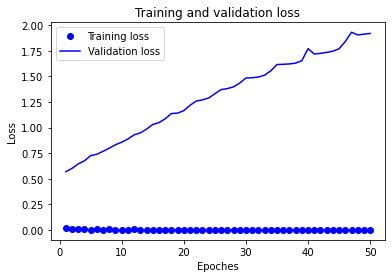

In [51]:
#학습용과 검증용 데이터에 대한 손실과 정확도출력
import matplotlib.pyplot as plt
%matplotlib inline

loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1,51)

#bo 파란색 점선
plt.plot(epochs, loss, 'bo', label='Training loss')

#b 파란색 실선
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epoches')
plt.ylabel('Loss')
plt.legend()
plt.show()

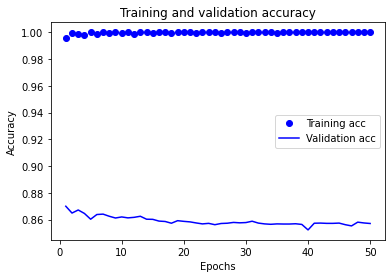

In [52]:
plt.clf() #그래프 초기화
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [53]:
# 새로운 데이터 예측
model.predict(x_test[:1000])

array([[5.75525348e-07],
       [1.00000000e+00],
       [7.92000055e-01],
       [8.17870796e-01],
       [9.99916315e-01],
       [1.00000000e+00],
       [6.22637142e-09],
       [1.13050940e-13],
       [9.99413848e-01],
       [1.00000000e+00],
       [4.89225984e-01],
       [2.83270837e-11],
       [8.14172170e-27],
       [2.78701262e-09],
       [1.00000000e+00],
       [8.79842257e-29],
       [9.99483347e-01],
       [2.59762317e-01],
       [7.97153684e-13],
       [1.23786563e-11],
       [1.00000000e+00],
       [1.00000000e+00],
       [2.50928750e-10],
       [1.00000000e+00],
       [9.73435283e-01],
       [1.00000000e+00],
       [5.73873112e-04],
       [9.99964714e-01],
       [1.00000000e+00],
       [6.32994410e-22],
       [1.00000000e+00],
       [4.89583969e-01],
       [9.99993801e-01],
       [1.10761237e-31],
       [1.26494393e-14],
       [7.00444324e-15],
       [1.00000000e+00],
       [1.00000000e+00],
       [3.43950302e-03],
       [3.43775342e-10],
